# Análise estátistica uso da energia solar e a carvão.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive

df = pd.read_csv('WorldEnergyConsumption.csv')

Latina = ['Brazil','Bolivia','Argentina','Chile','Peru','Ecuador','Guyana','Paraguay','Suriname','Uruguay','Venezuela','Colombia']

#Latina = df[(df["country"] == Latina)]

latina = df[(df["country"] == 'Brazil') | (df["country"] == 'Bolivia') | 
            (df["country"] == 'Argentina') | (df["country"] == 'Chile') | 
            (df["country"] == 'Ecuador') | (df["country"] == 'Peru') | 
            (df["country"] == 'Guyana') | (df["country"] == 'Paraguay') | 
            (df["country"] == 'Uruguay') | (df["country"] == 'Suriname') | 
            (df["country"] == 'Venezuela') | (df["country"] == 'Colombia')]

## Dados dos últimos 5 anos do Brasil em relação a energia solar.

In [2]:
brasil=df.loc[df['country'] == 'Brazil']
filtro = [col for col in df if col.startswith('solar')]
filtro.insert(0,'year')
filtro.insert(0,'country')

brasil[filtro].tail()

,country,year,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy
2971,Brazil,2018,316.131,6.944,9.158,16.368,3.44,43.575,0.579,0.263
2972,Brazil,2019,92.249,8.383,17.541,31.117,6.59,82.827,1.065,0.497
2973,Brazil,2020,61.518,10.687,28.228,49.907,10.64,132.405,1.732,0.832
2974,Brazil,2021,55.859,15.607,43.835,78.152,16.75,204.526,2.528,1.228
2975,Brazil,2022,79.835,34.708,78.544,122.983,26.48,364.788,3.889,2.109


## Gráfico do uso da energia solar dos países da américa latina.

In [3]:
df = latina[filtro].fillna(0)

#df = df[(df == 0).astype(int).sum(axis=1) < 5]
df = df.loc[(df['solar_consumption'] > 0)]

def grafico_consumo_pais(string):
    pais=df.loc[df['country'] == string]
    consumo_energia = pais.groupby('year')['solar_consumption'].sum().reset_index()
    consumo_energia = consumo_energia.sort_values('year')
    plt.figure(figsize=(10,6))
    plt.plot(consumo_energia['year'], consumo_energia['solar_consumption'], marker='o', linestyle='-', color='blue')
    plt.title('Consumo de energia solar do país '+string)
    plt.xlabel('Ano')
    plt.ylabel('Consumo de energia')
    plt.grid(True)
    
lista=df['country'].unique()

drop1=widgets.Dropdown(options=lista, value='Argentina', description='País:', disabled=False)
def update_dropdown(pais):
    grafico_consumo_pais(pais)

w = interactive(update_dropdown, pais=drop1) 
display(w)





interactive(children=(Dropdown(description='País:', options=('Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecua…

## Países com o maior e menor consumo de energia solar.

In [4]:
pais_max = df.groupby('country')['solar_consumption'].sum().idxmax()
consumo_max = df.groupby('country')['solar_consumption'].sum().max()

pais_min = df.groupby('country')['solar_consumption'].sum().idxmin()
consumo_min = df.groupby('country')['solar_consumption'].sum().min()
print(f"O país com o maior consumo de energia até hoje é o {pais_max} com {consumo_max} u.m. de consumo.")
print(f"O país com o menor consumo de energia até hoje é o {pais_min} com {consumo_min} u.m. de consumo.")

O país com o maior consumo de energia até hoje é o Brazil com 179.968 u.m. de consumo.
O país com o menor consumo de energia até hoje é o Venezuela com 0.107 u.m. de consumo.


## Gráfico comparando o uso da energia solar e a carvão com o passar dos anos.

In [11]:
filtro_solar = [col for col in latina if col.startswith('solar')]
filtro_solar.insert(0,'year')
filtro_solar.insert(0,'country')
df_solar = latina[filtro_solar]
df_solar = df_solar.loc[(df_solar['solar_consumption'] > 0)]

filtro_coal = [col for col in latina if col.startswith('coal')]
filtro_coal.insert(0,'year')
filtro_coal.insert(0,'country')

df_coal = latina[filtro_coal]
df_coal = df_coal.loc[(df_coal['coal_consumption'] > 0)]

def grafico_compara(string):
    pais_solar=df_solar.loc[df_solar['country'] == string]
    consumo_energia_solar = pais_solar.groupby('year')['solar_consumption'].sum().reset_index()
    consumo_energia_solar = consumo_energia_solar.sort_values('year')
    
    pais_coal=df_coal.loc[df_coal['country'] == string]
    consumo_energia_coal = pais_coal.groupby('year')['coal_consumption'].sum().reset_index()
    consumo_energia_coal = consumo_energia_coal.sort_values('year')
    
    
    plt.figure(figsize=(15,6))
    plt.plot(consumo_energia_solar['year'], consumo_energia_solar['solar_consumption'], marker='o', linestyle='-', color='blue',label='Energia solar')
    plt.plot(consumo_energia_coal['year'], consumo_energia_coal['coal_consumption'], marker='o', linestyle='-', color='red',label='Energia a carvão')
    
    plt.title('Consumo de energia do país '+string)
    plt.xlabel('Ano')
    plt.ylabel('Consumo de energia')
    plt.legend()
    
    plt.grid(True)
    plt.show()

lista=df_coal['country'].unique()

drop1=widgets.Dropdown(options=lista, value='Argentina', description='País:', disabled=False)
def update_dropdown(pais):
    grafico_compara(pais)

w = interactive(update_dropdown, pais=drop1) 
display(w)

interactive(children=(Dropdown(description='País:', options=('Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecua…

## Média do consumo de energia solar e a carvão dos países da américa latina.

In [6]:
print('Média de consumo de energia de cada país')
media_coal=df_coal.groupby('country')['coal_consumption'].mean()
media_solar=df_solar.groupby('country')['solar_consumption'].mean()

pd.concat([media_coal, media_solar], axis=1).reset_index()


Média de consumo de energia de cada país


,country,coal_consumption,solar_consumption
0,Argentina,10.777448,1.631667
1,Brazil,116.003966,16.360727
2,Chile,35.549810,12.553545
3,Colombia,35.397448,0.262083
4,Ecuador,0.136909,0.077545
5,Peru,4.923328,1.326909
6,Venezuela,1.485804,0.008231


## Desvio padrão no consumo de energia de cada país.

In [7]:
print('Desvio padrão no consumo de energia de cada país')
desvio_coal=df_coal.groupby('country')['coal_consumption'].std()
desvio_solar=df_solar.groupby('country')['solar_consumption'].std()

pd.concat([desvio_coal, desvio_solar], axis=1).reset_index()

Desvio padrão no consumo de energia de cada país


,country,coal_consumption,solar_consumption
0,Argentina,2.926179,2.644692
1,Brazil,58.014948,25.178595
2,Chile,26.692971,12.274193
3,Colombia,12.010107,0.424379
4,Ecuador,0.217536,0.039272
5,Peru,3.697886,0.893992
6,Venezuela,1.257732,0.006470


## Gráfico comparando o uso total de cada tipo de energia de cada país.

Text(0, 0.5, 'País')

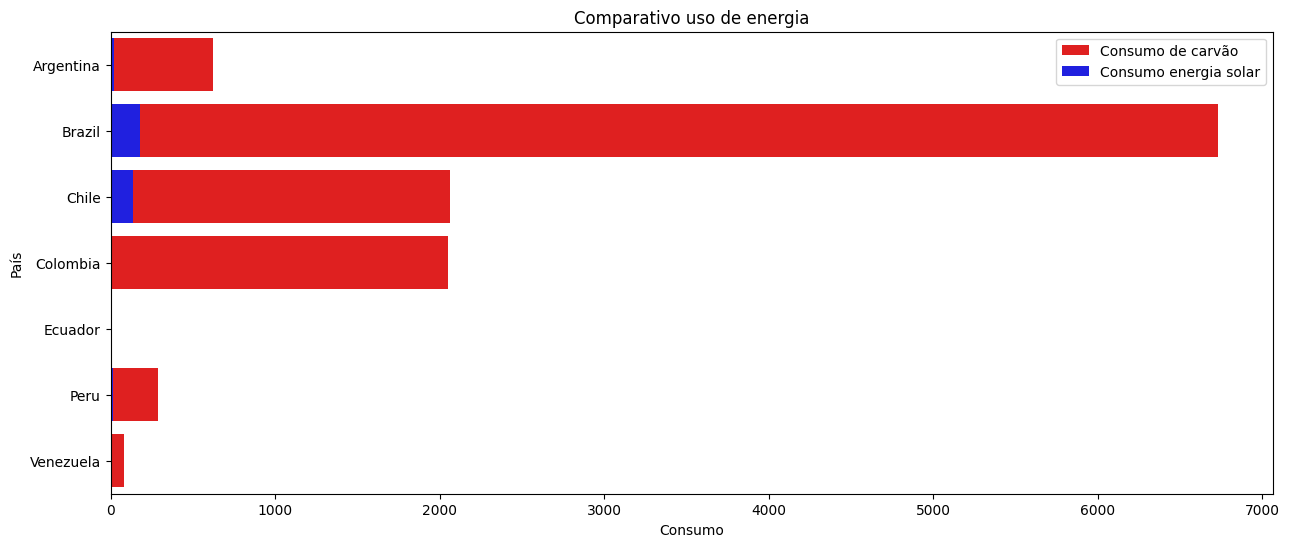

In [15]:
con_tot_coal=df_coal.groupby('country')['coal_consumption'].sum().reset_index()
con_tot_solar=df_solar.groupby('country')['solar_consumption'].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x='coal_consumption', y='country', data=con_tot_coal, color='red',label='Consumo de carvão')
sns.barplot(x='solar_consumption', y='country', data=con_tot_solar, color='blue',label='Consumo energia solar')
plt.title('Comparativo uso de energia')
plt.xlabel('Consumo')
plt.ylabel('País')

## Aumento percentual total do uso de cada energia nos países.

In [9]:


pct_coal=df_coal.groupby('country')['coal_cons_change_pct'].sum()
pct_solar=df_solar.groupby('country')['solar_cons_change_pct'].sum()

pd.concat([pct_coal, pct_solar], axis=1).reset_index()



,country,coal_cons_change_pct,solar_cons_change_pct
0,Argentina,191.532,3643.597
1,Brazil,236.937,2224.559
2,Chile,222.403,9061.860
3,Colombia,202.804,1511.307
4,Ecuador,5947.751,1960.981
5,Peru,414.216,442.464
6,Venezuela,2653.247,2.419


Com base no dados observados, o uso da energia baseado a carvão é extremamente dominante em todos os países da américa latina analizados. E mesmo que o uso da energia solar tenha crescido em alguns países o uso do carvão ainda é extremamente superior.